In [1]:
from qiskit.circuit.quantumcircuit import QuantumCircuit
import qiskit.quantum_info as qi

def LRU(n: int, D: int, seed: int = None) -> QuantumCircuit:
    """
    Arguments
        n: qubit size
        D: depth
    Returns
        qc: quantum circuit
    """
    qc = QuantumCircuit(n)
    for l in range(1, D+1):
        if n & 1 and l & 1:
            for i in range((n - 1) // 2):
                qc.append(qi.random_unitary(4, seed=seed).to_instruction(), [2 * i, 2 * i + 1])
        if n & 1 and not l & 1:
            for i in range((n - 1) // 2):
                qc.append(qi.random_unitary(4, seed=seed).to_instruction(), [2 * i + 1, 2 * i + 2])
        if not n & 1 and l & 1:
            for i in range(n // 2):
                qc.append(qi.random_unitary(4, seed=seed).to_instruction(), [2 * i, 2 * i + 1])
        if not n & 1 and not l & 1:
            for i in range(n // 2 - 1):
                qc.append(qi.random_unitary(4, seed=seed).to_instruction(), [2 * i + 1, 2 * i + 2])
        qc.barrier()

    return qc

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  DeprecationWarning,


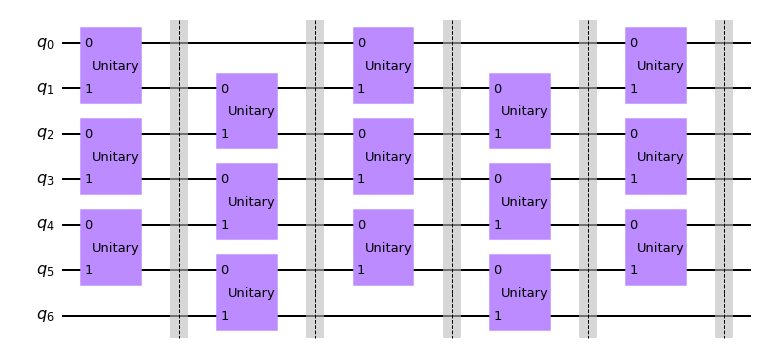

In [2]:
qc = LRU(7,5)
qc.draw("mpl")

In [4]:
qc.measure_all()

In [10]:
from qiskit import execute
from qiskit import Aer
from qiskit.visualization import plot_histogram

In [7]:
job = execute(qc, optimization_level=1, backend=Aer.get_backend("qasm_simulator"))

In [8]:
result = job.result()

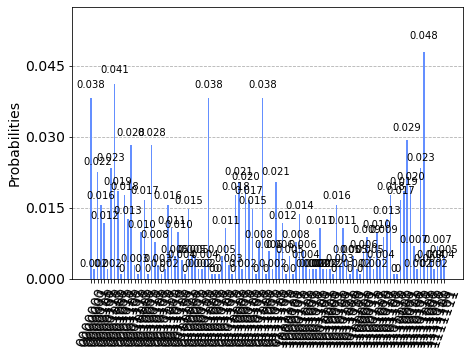

In [11]:
plot_histogram(result.get_counts())

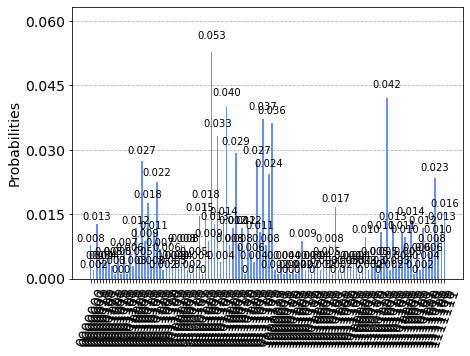

In [12]:
qc = LRU(7,2)
qc.measure_all()
job = execute(qc, optimization_level=1, backend=Aer.get_backend("qasm_simulator"))
result = job.result()
plot_histogram(result.get_counts())

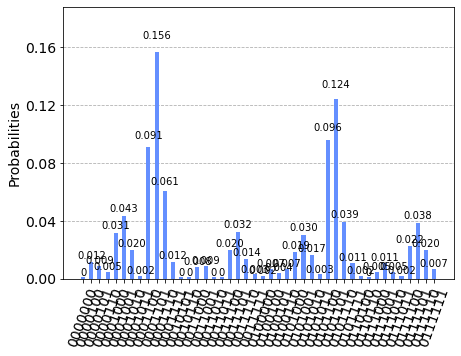

In [13]:
qc = LRU(7,1)
qc.measure_all()
job = execute(qc, optimization_level=1, backend=Aer.get_backend("qasm_simulator"))
result = job.result()
plot_histogram(result.get_counts())